In [1]:
import logging
import math
import os

In [2]:
logging.basicConfig(level=logging.INFO)

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import galsim

In [4]:
from chromatic_shear_sims import utils
from chromatic_shear_sims.throughputs import load_throughputs

In [5]:
throughputs = load_throughputs()

INFO:chromatic_shear_sims.throughputs:loading throughput for u-band from /home/smau/Documents/software/chromatic-shear-sims/src/chromatic_shear_sims/data/total_u.dat
INFO:chromatic_shear_sims.throughputs:loading throughput for g-band from /home/smau/Documents/software/chromatic-shear-sims/src/chromatic_shear_sims/data/total_g.dat
INFO:chromatic_shear_sims.throughputs:loading throughput for r-band from /home/smau/Documents/software/chromatic-shear-sims/src/chromatic_shear_sims/data/total_r.dat
INFO:chromatic_shear_sims.throughputs:loading throughput for i-band from /home/smau/Documents/software/chromatic-shear-sims/src/chromatic_shear_sims/data/total_i.dat
INFO:chromatic_shear_sims.throughputs:loading throughput for z-band from /home/smau/Documents/software/chromatic-shear-sims/src/chromatic_shear_sims/data/total_z.dat
INFO:chromatic_shear_sims.throughputs:loading throughput for y-band from /home/smau/Documents/software/chromatic-shear-sims/src/chromatic_shear_sims/data/total_y.dat


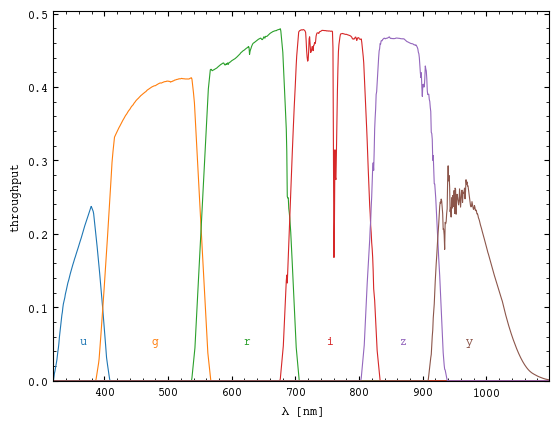

In [6]:
wl = np.linspace(
    throughputs["u"].blue_limit,
    throughputs["y"].red_limit,
    1000,
)

fig, axs = plt.subplots(
    1, 1
)

for band, throughput in throughputs.items():
    ts = throughput(wl)
    _l = axs.plot(wl, ts)
    label_position = np.average(wl, weights=ts)
    axs.text(label_position, 0.05, band, c=_l[0].get_color(), ha="center")

axs.set_xlim(wl.min(), wl.max())
axs.set_ylim(0, None)
axs.set_xlabel("$\lambda$ [$nm$]")
axs.set_ylabel("throughput")

plt.show(fig)